In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from NeuralNet import Linear, MeanSquaredError

In [2]:
seed = 42
np.random.seed(seed)

# membuat data dummy
# Luas rumah (m^2), antara 50 hingga 400 meter persegi sebanyak 500 samples
luas_rumah = np.round(np.random.uniform(50, 400, 500).reshape(-1, 1), 2)

# Harga rumah (dalam juta rupiah), dengan variasi acak
harga_rumah = np.round(
	(luas_rumah * 5 + np.random.normal(0, 75, luas_rumah.shape)).reshape(-1, 1), 2
)

In [3]:
X = luas_rumah
Y = harga_rumah

In [4]:
df = pd.DataFrame(np.concatenate([X, Y], axis=1), columns=['Luas Rumah (m^2)', 'Harga Rumah (juta rupiah)'])
df.head()

,Luas Rumah (m^2),Harga Rumah (juta rupiah)
0,181.09,931.08
1,382.75,2054.46
2,306.20,1602.28
3,259.53,1254.38
4,104.61,455.67


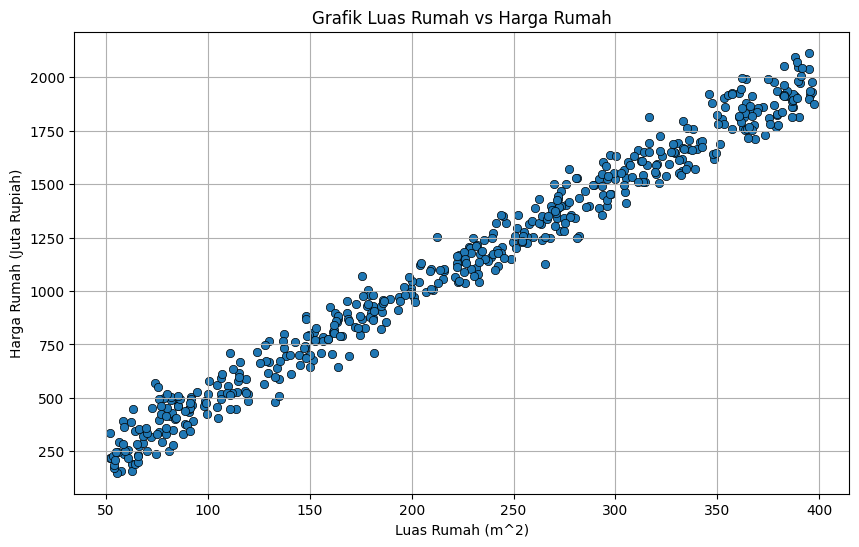

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors='black', linewidths=0.5)
plt.grid(True)
plt.xlabel('Luas Rumah (m^2)')
plt.ylabel('Harga Rumah (Juta Rupiah)')
plt.title('Grafik Luas Rumah vs Harga Rumah')
plt.show()

## Random Search Method

In [9]:
np.random.seed(42)

# Inisialisasi layer-layer
# input layer -> output layer
input_to_output_layer = Linear(in_features=1, out_features=1)  

# Inisialisasi Mean Squared Error sebagai loss function
loss = MeanSquaredError()
lowest_loss = float("inf")  # some initial value 

best_HL_1_weights, best_HL_1_biases = input_to_output_layer.weight.copy(), input_to_output_layer.bias.copy()

print(f'best_HL_1_weights: {best_HL_1_weights.shape} \n {best_HL_1_weights}')
print(f'best_HL_1_biases: {best_HL_1_biases.shape} \n {best_HL_1_biases}')

best_HL_1_weights: (1, 1) 
 [[0.00496714]]
best_HL_1_biases: (1, 1) 
 [[0.]]


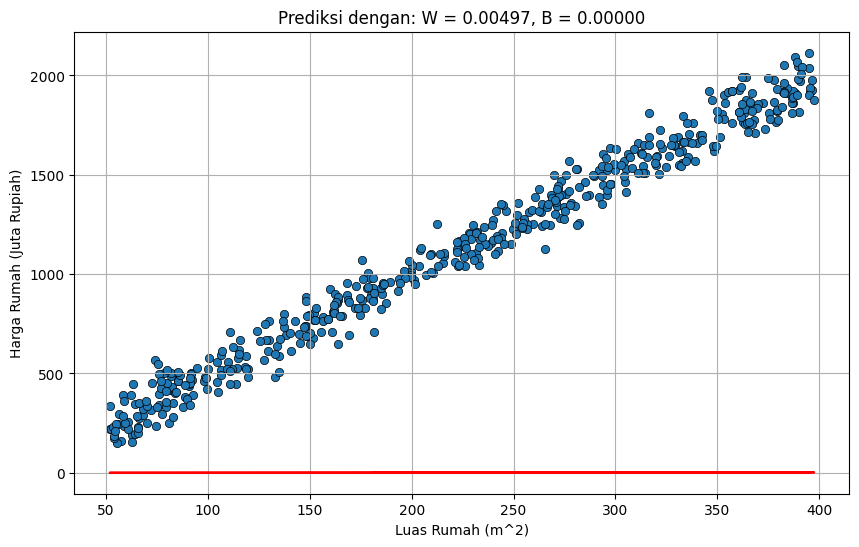

In [12]:
y_pred = input_to_output_layer.forward(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors='black', linewidths=0.5)
plt.plot(X, y_pred, color='red')
plt.grid(True)
plt.xlabel('Luas Rumah (m^2)')
plt.ylabel('Harga Rumah (Juta Rupiah)')
plt.title(f'Prediksi dengan: W = {input_to_output_layer.weight[0][0]:.5f}, B = {input_to_output_layer.bias[0][0]:.5f}')
plt.show()

In [13]:
for i in range(5000):
	# update weights and biases di hidden layer 1
	input_to_output_layer.weight -= np.random.normal(0, 0.1, input_to_output_layer.weight.shape)
	input_to_output_layer.bias -= np.random.normal(0, 0.1, input_to_output_layer.bias.shape)

	# Forward pass melalui jaringan
	Y_pred = input_to_output_layer.forward(X)  # Output akhir

	# Hitung rata-rata dari kuadrat selisih
	mse_loss = loss.calculate(Y, Y_pred)

	if mse_loss < lowest_loss:
		print(f'nilai parameter terbaik ditemukan pada iterasi ke-{i}, dengan loss: {lowest_loss}')
		best_HL_1_weights, best_HL_1_biases = input_to_output_layer.weight.copy(), input_to_output_layer.bias.copy()
		lowest_loss = mse_loss
	else:
		input_to_output_layer.weight, input_to_output_layer.bias = best_HL_1_weights.copy(), best_HL_1_biases.copy()

nilai parameter terbaik ditemukan pada iterasi ke-0, dengan loss: inf
nilai parameter terbaik ditemukan pada iterasi ke-2, dengan loss: 1533614.5609604411
nilai parameter terbaik ditemukan pada iterasi ke-5, dengan loss: 1519668.091143825
nilai parameter terbaik ditemukan pada iterasi ke-6, dengan loss: 1491476.912546147
nilai parameter terbaik ditemukan pada iterasi ke-7, dengan loss: 1377867.005976829
nilai parameter terbaik ditemukan pada iterasi ke-9, dengan loss: 1345231.5893663673
nilai parameter terbaik ditemukan pada iterasi ke-10, dengan loss: 1265807.7063410874
nilai parameter terbaik ditemukan pada iterasi ke-11, dengan loss: 1253301.9934291046
nilai parameter terbaik ditemukan pada iterasi ke-14, dengan loss: 1175633.9095371785
nilai parameter terbaik ditemukan pada iterasi ke-16, dengan loss: 1159945.1171241298
nilai parameter terbaik ditemukan pada iterasi ke-17, dengan loss: 1104514.1559486494
nilai parameter terbaik ditemukan pada iterasi ke-18, dengan loss: 1042093.211

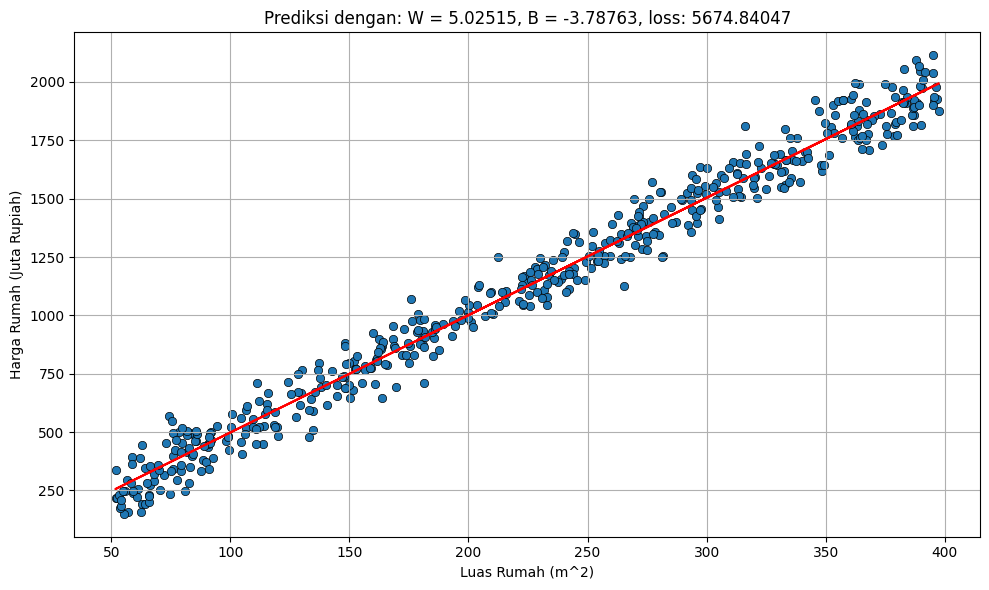

In [14]:
y_pred = input_to_output_layer.forward(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors='black', linewidths=0.5)
plt.plot(X, y_pred, color='red')
plt.grid(True)
plt.xlabel('Luas Rumah (m^2)')
plt.ylabel('Harga Rumah (Juta Rupiah)')
plt.title(f'Prediksi dengan: W = {input_to_output_layer.weight[0][0]:.5f}, B = {input_to_output_layer.bias[0][0]:.5f}, loss: {lowest_loss:.5f}')
plt.tight_layout()
plt.show()

## Gradient Descent Method

In [ ]:
np.random.seed(42)

# Inisialisasi layer-layer
# input layer -> output layer
input_to_output_layer = Linear(in_features=1, out_features=1)  

# Inisialisasi Mean Squared Error sebagai loss function
loss = MeanSquaredError()
lowest_loss = float("inf")  # some initial value 

best_HL_1_weights, best_HL_1_biases = input_to_output_layer.weight.copy(), input_to_output_layer.bias.copy()

print(f'best_HL_1_weights: {best_HL_1_weights.shape} \n {best_HL_1_weights}')
print(f'best_HL_1_biases: {best_HL_1_biases.shape} \n {best_HL_1_biases}')

best_HL_1_weights: (1, 1) 
 [[0.00496714]]
best_HL_1_biases: (1, 1) 
 [[0.]]


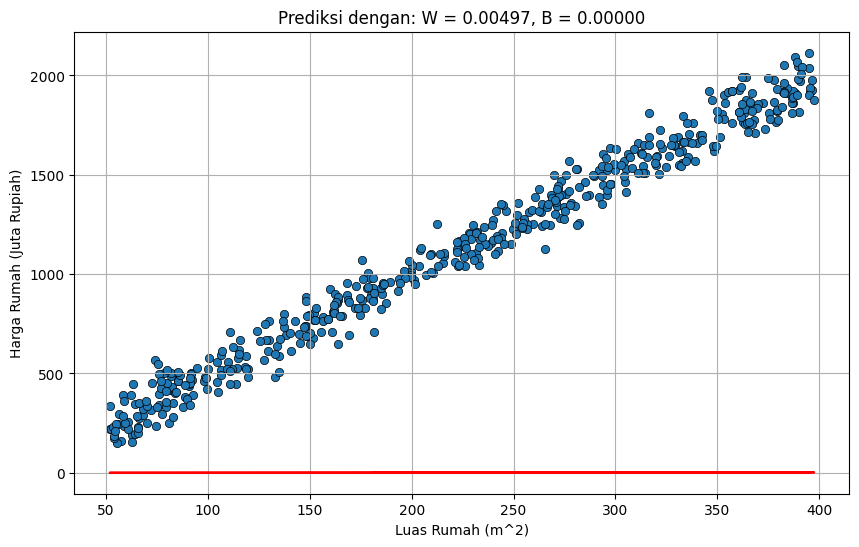

In [16]:
y_pred = input_to_output_layer.forward(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors='black', linewidths=0.5)
plt.plot(X, y_pred, color='red')
plt.grid(True)
plt.xlabel('Luas Rumah (m^2)')
plt.ylabel('Harga Rumah (Juta Rupiah)')
plt.title(f'Prediksi dengan: W = {input_to_output_layer.weight[0][0]:.5f}, B = {input_to_output_layer.bias[0][0]:.5f}')
plt.show()

In [17]:
# Hyperparameter
learning_rate = 0.00001  # Disesuaikan agar konvergensi stabil
iterations = 5000
stagnation_counter = 0
best_loss = float("inf")
patience = 5  # Jumlah iterasi yang diperbolehkan tanpa penurunan loss
epsilon = 1e-2  # Threshold minimum perubahan loss yang dianggap signifikan

In [18]:
for i in range(iterations):
	# Forward pass
	Y_pred = input_to_output_layer.forward(X)
	# Hitung loss
	mse_loss = loss.calculate(Y, Y_pred)

	# Hitung gradien menggunakan turunan Mean Squared Error
	dL_dY_pred = (-2 / len(Y)) * (Y - Y_pred)  # dL/dY_pred
	dL_dW = np.sum(dL_dY_pred * X)  # dL/dW
	dL_dB = np.sum(dL_dY_pred)  # dL/dB

	# Update bobot dan bias dengan Gradient Descent
	input_to_output_layer.weight -= learning_rate * dL_dW
	input_to_output_layer.bias -= learning_rate * dL_dB

	# Early stopping condition dengan threshold
	if best_loss - mse_loss > epsilon:  # Jika penurunan loss lebih besar dari threshold
		print(f"Iterasi {i}: mse_loss turun dari {best_loss:.6f} ke {mse_loss:.6f}")
		best_loss = mse_loss
		stagnation_counter = 0  # Reset counter jika loss turun signifikan
	else:
		stagnation_counter += 1  # Tambah counter jika loss stagnan
		print(f"Iterasi {i}: Loss stagnan ({stagnation_counter}/{patience})")

	# Jika stagnasi lebih lama dari patience, hentikan loop
	if stagnation_counter >= patience:
		print(f"Training dihentikan lebih awal pada iterasi {i} karena loss tidak turun signifikan selama {patience} iterasi.")
		break

Iterasi 0: mse_loss turun dari inf ke 1541944.287408
Iterasi 1: mse_loss turun dari 1541944.287408 ke 84243.090803
Iterasi 2: mse_loss turun dari 84243.090803 ke 9703.481976
Iterasi 3: mse_loss turun dari 9703.481976 ke 5891.895979
Iterasi 4: mse_loss turun dari 5891.895979 ke 5696.990245
Iterasi 5: mse_loss turun dari 5696.990245 ke 5687.023600
Iterasi 6: mse_loss turun dari 5687.023600 ke 5686.513822
Iterasi 7: mse_loss turun dari 5686.513822 ke 5686.487622
Iterasi 8: Loss stagnan (1/5)
Iterasi 9: Loss stagnan (2/5)
Iterasi 10: Loss stagnan (3/5)
Iterasi 11: Loss stagnan (4/5)
Iterasi 12: Loss stagnan (5/5)
Training dihentikan lebih awal pada iterasi 12 karena loss tidak turun signifikan selama 5 iterasi.


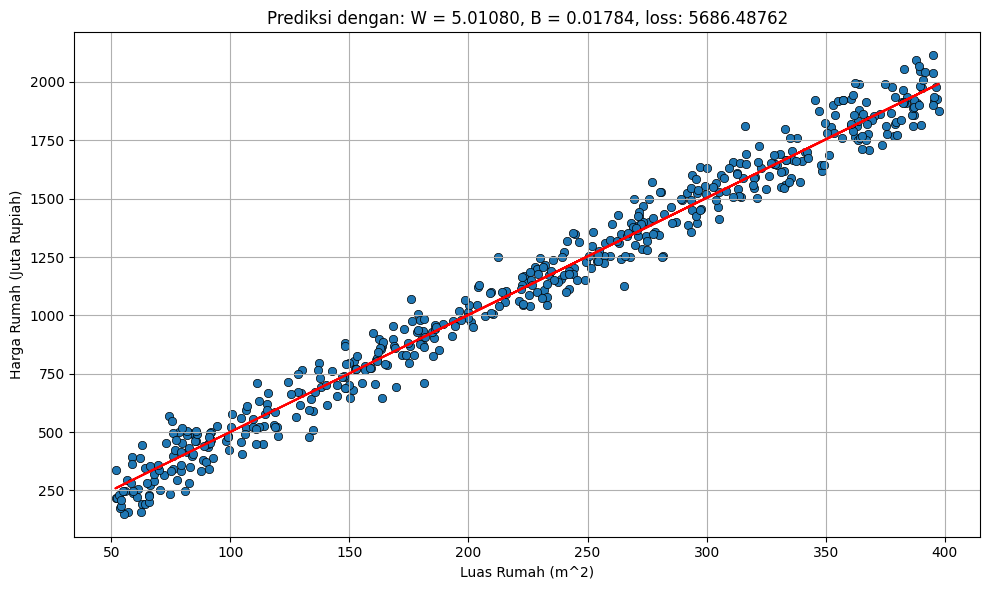

In [19]:
y_pred = input_to_output_layer.forward(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, edgecolors='black', linewidths=0.5)
plt.plot(X, y_pred, color='red')
plt.grid(True)
plt.xlabel('Luas Rumah (m^2)')
plt.ylabel('Harga Rumah (Juta Rupiah)')
plt.title(f'Prediksi dengan: W = {input_to_output_layer.weight[0][0]:.5f}, B = {input_to_output_layer.bias[0][0]:.5f}, loss: {best_loss:.5f}')
plt.tight_layout()
plt.show()